## Signal 
- A signal is a variation in a certain quantity over time. For audio, the quantity that varies is air pressure. How do we capture this information digitally? 
- We can take samples of the air pressure over time. 
- The rate at which we sample the data can vary, but is most commonly. 44.1 kHz, or 44,100 samples per second. 
- What we have captured is a waveform for the signal, and this can be interpreted, modified, and analyzed with computer software. 

In [ ]:
!pip install librosa
!pip install matplotlib

Text(0, 0.5, 'Amplitude')

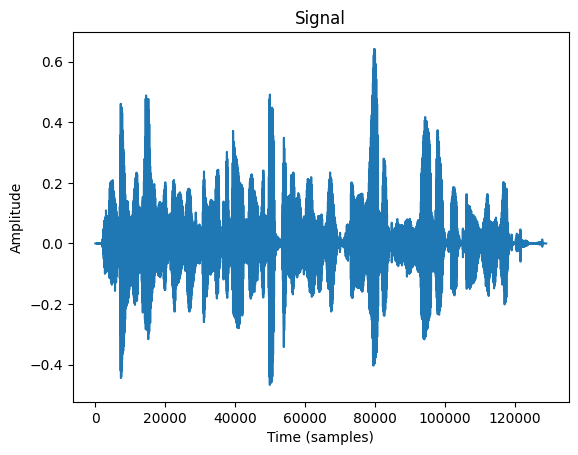

In [2]:
import librosa 
import librosa.display 
import matplotlib.pyplot as plt 

y, sr = librosa.load(r'C:\Users\info\Desktop\selfmade\turkish_service_sentences_003.wav')

plt.plot(y)
plt.title('Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

- Welcome to the field of signal processing. 
- You may be wondering though, how do we extract useful information from this? It looks like a jumbled mess. 
- This is where our friend Fourier comes in. 

## The Fourier Transform 
- An audio signal is comprised of several single-frequency sound waves. 
- When taking samples of the signal over time, we only capture the resulting amplitudes. 
- The Fourier transform is a mathematical formula that allows us to decompose a signal into it's individual frequencies and the freqency's amplitude. 
- In other words, it converts the signal from the time domain into the frequency domain. 
- The result is called a spectrum.
- 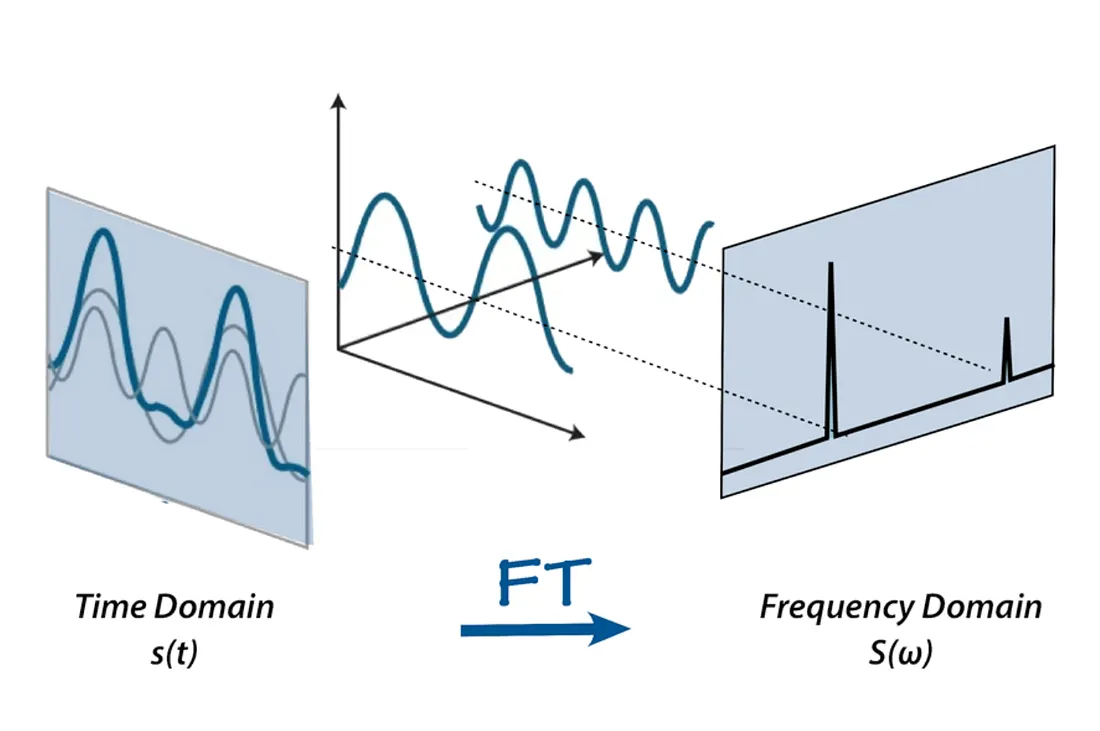

- This is possible because every signal can be decomposed into a set of sine and cosine waves that add up to the original signal. 
- This is a remarkable theorem known as Fourier's theorem. 

- The fast Fourier transform (FFT) is an algorithm that can efficiently compute the Fourier transform. 
- It is widely used in signal processing. 
- We will use this algorithm on a windowed segment of our example audio. 

In [ ]:
!pip install numpy

Text(0, 0.5, 'Amplitude')

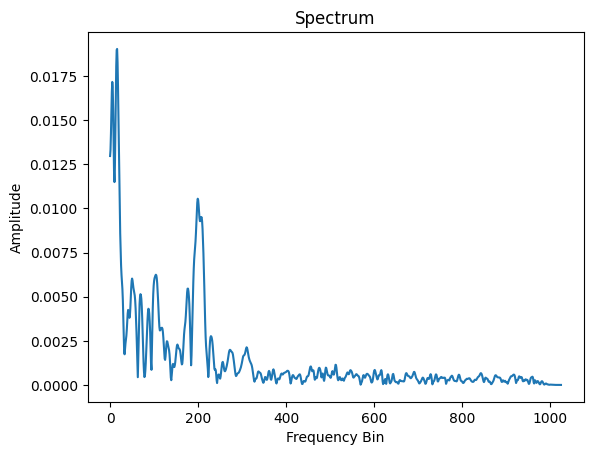

In [3]:
import numpy as np 

n_fft = 2048 
ft = np.abs(librosa.stft(y[:n_fft], hop_length = n_fft+1))

plt.plot(ft)
plt.title('Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')

## The Spectrogram 
- The fast Fourier transform is a powerful tool that allows us to analyze the frequency content of a signal, but what if our signal's frequency content varies over time? 
- These signals are known an non periodic signals. 
- We need a way to represent the spectrum of these signals as they vary over time. 
- You may be thinking, "hey, can't we compute several spectrums by performing FFT on several windowed segments of the signal?" 
- Yes! This is exactly what is done, and it is called the short-time Fourier transform. 
- The FFT is computed on overlapping windowed segments of the signal, and we get what is called the spectrogram. 
- A good visual in order:
- 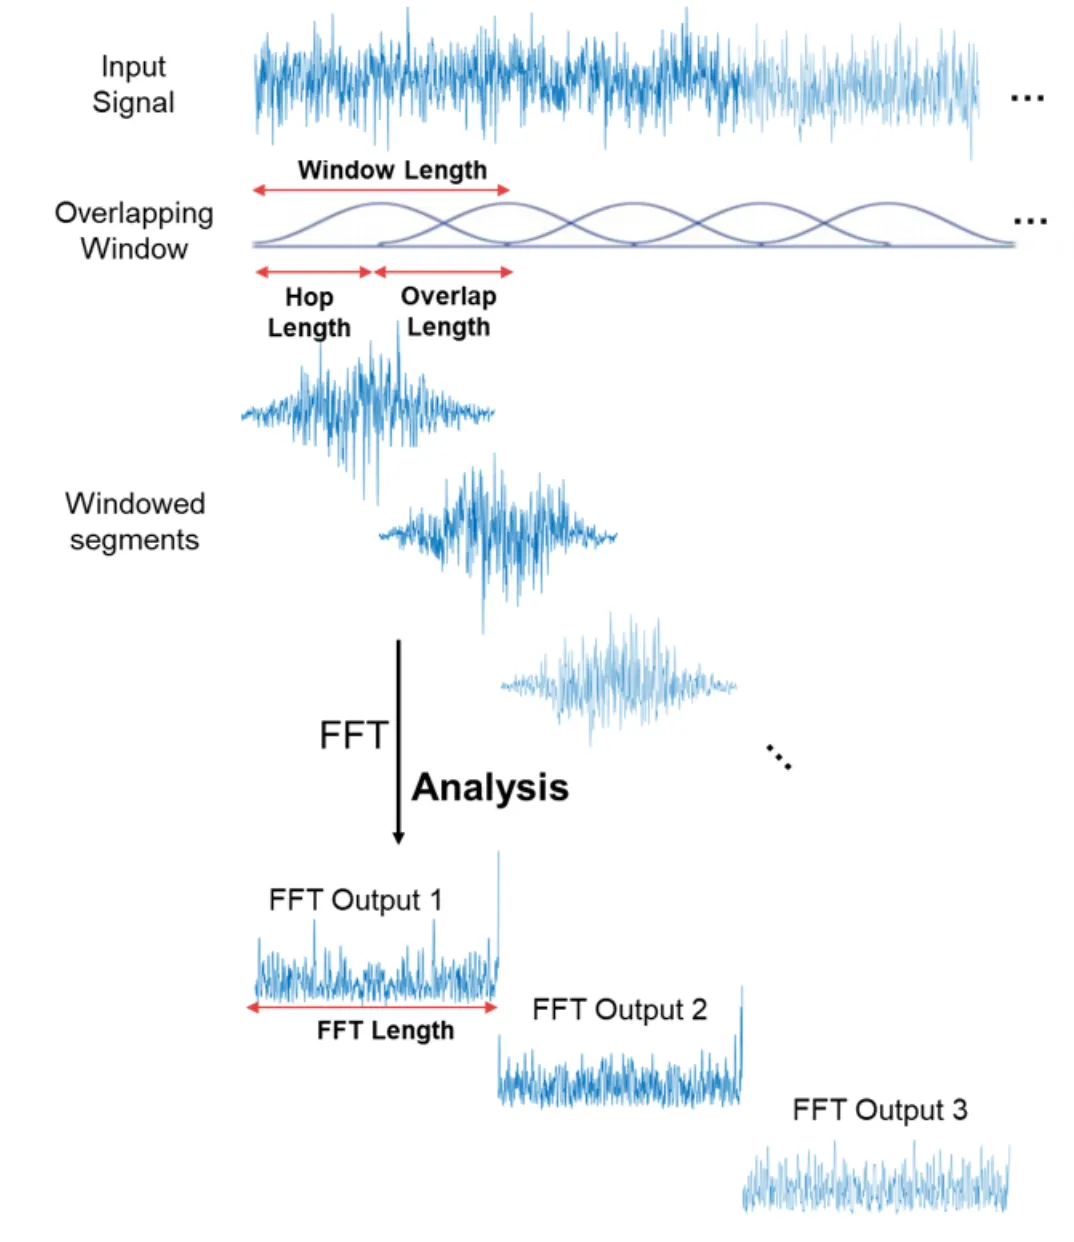

- You can think of a spectrogram as a bunch of FFTs stacked on top of each other. It is a way to visually represent a signal's loudness, or amplitude, as it varies over time at different frequencies. 
- There are some additional detalils going on behind the scenes when computing the spectrogram. 
- The y-axis is converted to a log scale, and the color dimension is converted to decibels (you can think of this as the log scale of the amplitude.)
- This is because humans can only perceive a very small and concentrated range of frequencies and amplitudes. 

Text(0.5, 1.0, 'Spectrogram')

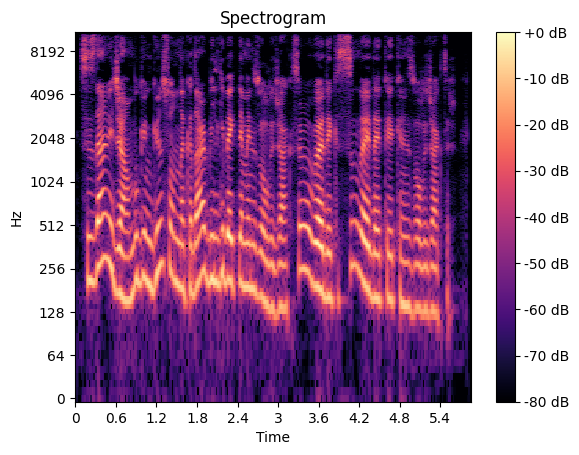

In [5]:
spec = np.abs(librosa.stft(y, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)

librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

- With only a couple lines of code, we have created a spectrogram. 
- We are almost there! We have a solid grasp on the "spectrogram" part, but what about "Mel". Who is he? 

## The Mel Scale 
- Studies have shown that humans do not perceive frequencies on a linear scale. 
- We are better at detecting differences in lower frequencies than higher frequencies. 
- For example, we can easily tell the difference between 500 and 1000 Hz, but we will hardly be able to tell a difference between 10000 and 10500, even though the distance between the two pairs are the same. 
- In 1937, Stevens, Volkmann, and Newmann proposed a unit of pitch such that equal distances in pitch sounded equally distant to the listener. This is called the mel scale.
- We perform a mathematical operation on frequencies to convert them to the mel scale. 
- 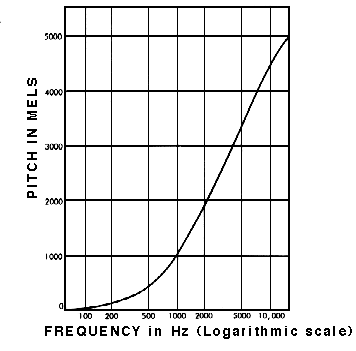

## The Mel Spectrogram 
- A mel spectrogram is a spectrogram where the frequencies are converted to the mel scale. 
- I know right? Who would have thought? What's amazing is that after going through all those mental gymnastics to try to understand the mel spectrogram, it can be implemented in only a couple lines of code. 

In [7]:
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')

NameError: name 'spect' is not defined